# Exercice 1: Table de Hachage (TH) - gestion des collisions par chaînage.

1. Écrire les fonctions permettant d'ajouter, rechercher ou supprimer un élément (nombre entier) dans une table de hachage de taille m en utilisant la gestion de collision par chaînage et des structures de données de votre choix (liste, dictionnaire, combinaison liste & dictionnaire, ...). Prendre la FH H(c) = c % m.
2. Prendre m = 100, 1000, 10000 puis 100000 et à chaque fois n = 2 * m. Générer aléatoirement n entiers puis les insérer dans la TH.


In [1]:
import random

class HashTable:
    def __init__(self, size):
        self.size = size
        self.table = [[] for _ in range(size)]

    def hash_function(self, key):
        return key % self.size

    def insert(self, key):
        hash_index = self.hash_function(key)
        if key not in self.table[hash_index]:
            self.table[hash_index].append(key)

    def search(self, key):
        hash_index = self.hash_function(key)
        if key in self.table[hash_index]:
            return True
        return False

    def delete(self, key):
        hash_index = self.hash_function(key)
        if key in self.table[hash_index]:
            self.table[hash_index].remove(key)

m_values = [100, 1000, 10000, 100000]

for m in m_values:
    n = 2 * m
    hash_table = HashTable(m)
    random_integers = [random.randint(0, 1000000) for _ in range(n)]
    
    for num in random_integers:
        hash_table.insert(num)
    
    search_key = random_integers[0]
    print(f"Search {search_key}: {hash_table.search(search_key)}")
    hash_table.delete(search_key)
    print(f"Search {search_key} after deletion: {hash_table.search(search_key)}")

Search 42807: True
Search 42807 after deletion: False
Search 409659: True
Search 409659 after deletion: False
Search 72020: True
Search 72020 after deletion: False
Search 310283: True
Search 310283 after deletion: False


# Exercice 2: Table de hachage, gestion des collisions par adressage ouvert

On utilise une fonction h à 2 arguments h(c,i,a) : tel que i = nbr d'essais de placement déjà effectués et le nombre a représente le pas. Ajouter un élément de clé c à la table revient alors à regarder si la cellule d'indice h(c,0,a) est vide. Si c'est le cas, on y met l'élément, sinon on essaie la cellule d'indice h(c,1,a), puis h(c,2,a), ...


On considère la fonction de hachage :
h(c,i,a) = (h'(c)+ i*a) mod(m) avec h'(c)= c mod(m) avec m = 11.

1. Proposer deux autres méthodes de sondage pour gérer les collisions :
    - Sondage quadratiques
    - Double hachage

2. Écrire les fonctions permettant d'ajouter, rechercher ou supprimer un élément dans une table de hachage pour chaque manière de sondage.

3. Prendre m ~ 10, 100, 1000 puis 10000 (vous pouvez choisir m un nombre premier) et à chaque fois n = 0,7*m. Générer aléatoirement n entier entre 0 et m-1 puis insérer les dans la TH en utilisant : sondage linéaire, quadratique et double hachage. Comparer et ploter les temps d’exécutions de chaque méthode.


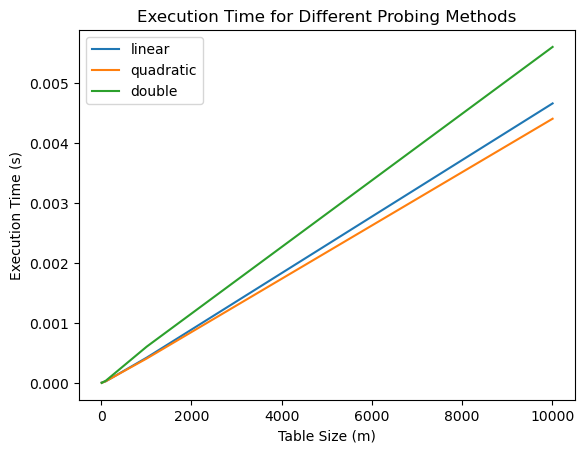

In [4]:
import time
import random
import matplotlib.pyplot as plt

class OpenAddressingHashTable:
    def __init__(self, size, probing_method='linear'):
        self.size = size
        self.table = [None] * size
        self.probing_method = probing_method

    def hash_function(self, key):
        return key % self.size

    def linear_probing(self, key, i):
        return (self.hash_function(key) + i) % self.size

    def quadratic_probing(self, key, i):
        return (self.hash_function(key) + i**2) % self.size

    def double_hashing(self, key, i):
        h1 = self.hash_function(key)
        h2 = 1 + (key % (self.size - 1))
        return (h1 + i * h2) % self.size

    def probe(self, key, i):
        if self.probing_method == 'linear':
            return self.linear_probing(key, i)
        elif self.probing_method == 'quadratic':
            return self.quadratic_probing(key, i)
        elif self.probing_method == 'double':
            return self.double_hashing(key, i)
        else:
            raise ValueError("Invalid probing method")

    def insert(self, key):
        for i in range(self.size):
            index = self.probe(key, i)
            if self.table[index] is None:
                self.table[index] = key
                return
        raise Exception("Hash table is full")

    def search(self, key):
        for i in range(self.size):
            index = self.probe(key, i)
            if self.table[index] is None:
                return False
            if self.table[index] == key:
                return True
        return False

    def delete(self, key):
        for i in range(self.size):
            index = self.probe(key, i)
            if self.table[index] is None:
                return
            if self.table[index] == key:
                self.table[index] = None
                return

# Function to measure execution time
def measure_time(hash_table, keys, operation):
    start_time = time.time()
    for key in keys:
        if operation == 'insert':
            hash_table.insert(key)
        elif operation == 'search':
            hash_table.search(key)
        elif operation == 'delete':
            hash_table.delete(key)
    end_time = time.time()
    return end_time - start_time

# Parameters
m_values = [11, 101, 1009, 10007]
n_values = [int(0.7 * m) for m in m_values]
probing_methods = ['linear', 'quadratic', 'double']

# Measure and plot execution times
times = {method: [] for method in probing_methods}

for m, n in zip(m_values, n_values):
    random_integers = [random.randint(0, m-1) for _ in range(n)]
    
    for method in probing_methods:
        hash_table = OpenAddressingHashTable(m, probing_method=method)
        execution_time = measure_time(hash_table, random_integers, 'insert')
        times[method].append((m, execution_time))

plt.figure()
for method in probing_methods:
    sizes, execution_times = zip(*times[method])
    plt.plot(sizes, execution_times, label=method)
plt.xlabel('Table Size (m)')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time for Different Probing Methods')
plt.legend()
plt.show()


# Exercice 3: Implémenter le filtre de Bloom

Implémenter le filtre de Bloom vu au cours, en prenant les paramètres (n, m, k) = (5.103, 25.103, 3). Les éléments traités seront des entiers générés aléatoirement et à vous de proposer les k Fonctions de Hachage.

Prendre k = 2, 3 et k = 4, puis comparer le pourcentage des faux positifs pour k = 2, 3 et 4.


In [8]:
import random
import mmh3
from bitarray import bitarray

class BloomFilter:
    def __init__(self, size, num_hashes):
        self.size = size
        self.num_hashes = num_hashes
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)

    def add(self, item):
        for i in range(self.num_hashes):
            index = mmh3.hash(item, i) % self.size
            self.bit_array[index] = 1

    def check(self, item):
        for i in range(self.num_hashes):
            index = mmh3.hash(item, i) % self.size
            if self.bit_array[index] == 0:
                return False
        return True

def false_positive_rate(bloom_filter, test_elements, actual_elements):
    false_positives = 0
    for item in test_elements:
        if bloom_filter.check(item) and item not in actual_elements:
            false_positives += 1
    return false_positives / len(test_elements)

# Parameters
n = 5103
m = 25103
k_values = [2, 3, 4]

# Generate random elements
random_elements = [str(random.randint(0, 1000000)) for _ in range(n)]
test_elements = [str(random.randint(0, 1000000)) for _ in range(n)]

# Compare false positive rates
for k in k_values:
    bloom_filter = BloomFilter(m, k)
    for item in random_elements:
        bloom_filter.add(item)
    
    fp_rate = false_positive_rate(bloom_filter, test_elements, random_elements)
    print(f"False positive rate for k={k}: {fp_rate:.4f}")

False positive rate for k=2: 0.1025
False positive rate for k=3: 0.0888
False positive rate for k=4: 0.0909


# Exercice 4: Implémentation d’un CMS

En utilisant les notations du cours, implémenter un CMS en choisissant les paramètres adéquats de sorte à montrer l’intérêt d’augmenter le nombre de fonctions de hachages pour améliorer la précision.

In [9]:
import mmh3
import numpy as np

class CountMinSketch:
    def __init__(self, width, depth):
        self.width = width
        self.depth = depth
        self.table = np.zeros((depth, width), dtype=int)
        self.hash_seeds = [random.randint(0, 10000) for _ in range(depth)]

    def add(self, item):
        for i in range(self.depth):
            index = mmh3.hash(item, self.hash_seeds[i]) % self.width
            self.table[i][index] += 1

    def estimate(self, item):
        min_count = float('inf')
        for i in range(self.depth):
            index = mmh3.hash(item, self.hash_seeds[i]) % self.width
            min_count = min(min_count, self.table[i][index])
        return min_count

# Parameters
width = 1000
depth_values = [3, 5, 7]
n = 10000

# Generate random elements
random_elements = [str(random.randint(0, 1000000)) for _ in range(n)]
test_elements = [str(random.randint(0, 1000000)) for _ in range(n)]

# Compare accuracy with different depths
for depth in depth_values:
    cms = CountMinSketch(width, depth)
    for item in random_elements:
        cms.add(item)
    
    total_error = 0
    for item in test_elements:
        actual_count = random_elements.count(item)
        estimated_count = cms.estimate(item)
        total_error += abs(actual_count - estimated_count)
    
    avg_error = total_error / n
    print(f"Average error for depth={depth}: {avg_error:.4f}")

Average error for depth=3: 7.3709
Average error for depth=5: 6.4565
Average error for depth=7: 5.9334
